In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
folder_path = r"D:\USTH\Year_3\Internship\DeffendThesis\Data"
file_name = "Data_UF_cleaned.xlsx"


df = pd.read_excel(f"{folder_path}\\{file_name}")

In [51]:
print("=== INFO ===")
print(df.info())

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23623 entries, 0 to 23622
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract_ID       21593 non-null  object 
 1   Vùng              21593 non-null  object 
 2   CN quản lý        21593 non-null  object 
 3   Đơn vị bán hàng   5514 non-null   object 
 4   CN bán            19832 non-null  object 
 5   Vùng bán          19832 non-null  object 
 6   Ngày tạo          23623 non-null  object 
 7   OrderID/RegCode   16282 non-null  object 
 8   Transaction code  1254 non-null   object 
 9   Type              16927 non-null  object 
 10  Câu lệnh gói FG   23622 non-null  object 
 11  Tháng TT          23623 non-null  int64  
 12  Doanh thu         23622 non-null  float64
 13  Kênh bán          22490 non-null  object 
 14  Status FGame      23623 non-null  object 
 15  Ngày active       20699 non-null  object 
 16  Ngày SD từ        15560 non

In [52]:
print("\n=== DESCRIBE ===")
print(df.describe(include='all'))


=== DESCRIBE ===
                  Contract_ID            Vùng CN quản lý Đơn vị bán hàng  \
count                   21593           21593      21593            5514   
unique                  21540              15         69              16   
top     HD4018334318042840576  07.Ho Chi Minh     HCM_04             IBB   
freq                        3           15030      13516            4030   
mean                      NaN             NaN        NaN             NaN   
std                       NaN             NaN        NaN             NaN   
min                       NaN             NaN        NaN             NaN   
25%                       NaN             NaN        NaN             NaN   
50%                       NaN             NaN        NaN             NaN   
75%                       NaN             NaN        NaN             NaN   
max                       NaN             NaN        NaN             NaN   

            CN bán        Vùng bán    Ngày tạo  OrderID/RegCode  \
co

In [53]:
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())




=== MISSING VALUES ===
Contract_ID          2030
Vùng                 2030
CN quản lý           2030
Đơn vị bán hàng     18109
CN bán               3791
Vùng bán             3791
Ngày tạo                0
OrderID/RegCode      7341
Transaction code    22369
Type                 6696
Câu lệnh gói FG         1
Tháng TT                0
Doanh thu               1
Kênh bán             1133
Status FGame            0
Ngày active          2924
Ngày SD từ           8063
Ngày SD đến          8063
Gói internet         2924
Ngày hủy            10199
Hình thức bán           0
dtype: int64


In [54]:
# Remove row contain "Bundle"
df = df[df['Hình thức bán'] != 'Bundle']


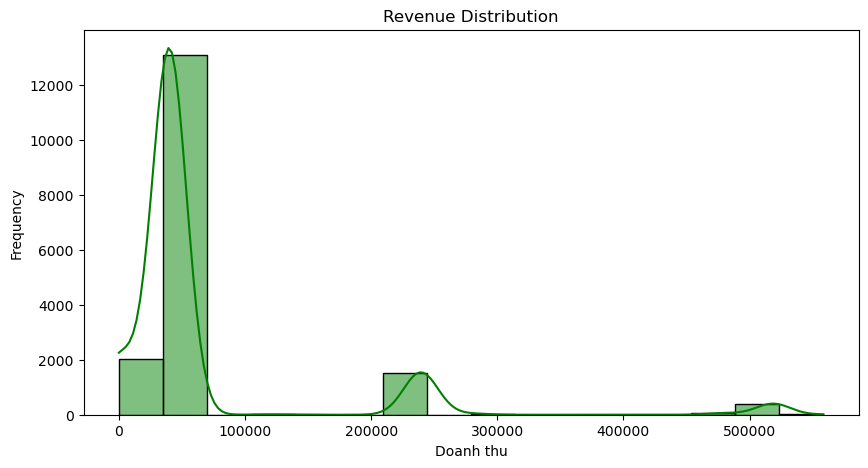

In [55]:
# ---------------------------
# 2. REVENUE DISTRIBUTION
# ---------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['Doanh thu'], kde=True, color='green')
plt.title('Revenue Distribution')
plt.xlabel('Doanh thu')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from dateutil import parser
# Force full parsing first (convert all to datetime)
def parse_mixed_date_force(date_str):
    try:
        return pd.to_datetime(str(date_str), dayfirst=True, errors='coerce')
    except:
        return pd.NaT

df['Ngày tạo'] = df['Ngày tạo'].apply(parse_mixed_date_force)

# Now format to consistent dd/mm/yyyy
df['Ngày tạo'] = df['Ngày tạo'].dt.strftime('%d/%m/%Y')
    
# Filter valid date range
df = df[(df['Ngày tạo'] >= '2024-01-01') & (df['Ngày tạo'] <= '2025-01-12')]

# Group by month and compute total revenue
df['month'] = df['Ngày tạo'].dt.to_period('M')
monthly_rev = df.groupby('month')['Doanh thu'].sum().reset_index()
monthly_rev['month'] = monthly_rev['month'].astype(str)



C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_33352\1636775708.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(str(date_str), dayfirst=True, errors='coerce')


In [ ]:
output_file = 'Cleaned_UF.xlsx'
df.to_excel(output_file, index=False)

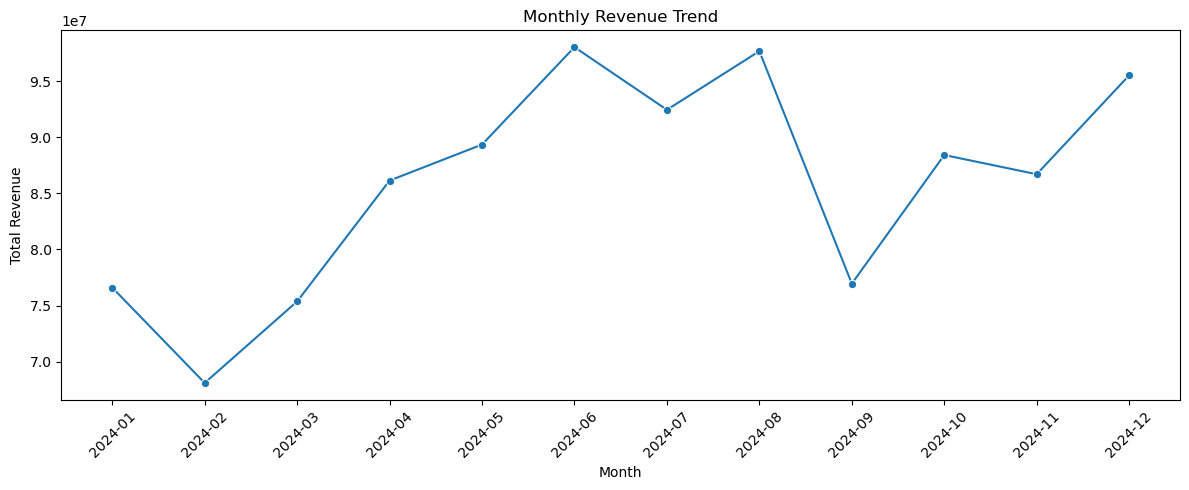

Month-over-Month Revenue Changes:
      month   Doanh thu  Doanh thu_diff  Doanh thu_pct_change
0   2024-01  76608000.0             NaN                   NaN
1   2024-02  68109300.0      -8498700.0            -11.093750
2   2024-03  75371100.0       7261800.0             10.661980
3   2024-04  86144100.0      10773000.0             14.293277
4   2024-05  89351100.0       3207000.0              3.722832
5   2024-06  98034300.0       8683200.0              9.718067
6   2024-07  92448300.0      -5586000.0             -5.698006
7   2024-08  97675200.0       5226900.0              5.653863
8   2024-09  76957200.0     -20718000.0            -21.211116
9   2024-10  88418400.0      11461200.0             14.892953
10  2024-11  86708100.0      -1710300.0             -1.934326
11  2024-12  95520600.0       8812500.0             10.163410


In [ ]:
# Remove incomplete January 2025
monthly_rev = monthly_rev[monthly_rev['month'] != '2025-01']

# ---------------------------
# 5. Compute changes
# ---------------------------
monthly_rev['Doanh thu_diff'] = monthly_rev['Doanh thu'].diff()
monthly_rev['Doanh thu_pct_change'] = monthly_rev['Doanh thu'].pct_change() * 100

# ---------------------------
# 6. Plot Monthly Revenue
# ---------------------------
plt.figure(figsize=(12, 5))
sns.lineplot(x='month', y='Doanh thu', data=monthly_rev, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Optional: Show MoM changes
# ---------------------------
print("Month-over-Month Revenue Changes:")
print(monthly_rev[['month', 'Doanh thu', 'Doanh thu_diff', 'Doanh thu_pct_change']])

In [ ]:
monthly_rev

,month,Doanh thu,Doanh thu_diff,Doanh thu_pct_change
0,2024-01,76608000.0,NaN,NaN
1,2024-02,68109300.0,-8498700.0,-11.093750
2,2024-03,75371100.0,7261800.0,10.661980
3,2024-04,86144100.0,10773000.0,14.293277
4,2024-05,89351100.0,3207000.0,3.722832
5,2024-06,98034300.0,8683200.0,9.718067
6,2024-07,92448300.0,-5586000.0,-5.698006
7,2024-08,97675200.0,5226900.0,5.653863
8,2024-09,76957200.0,-20718000.0,-21.211116
9,2024-10,88418400.0,11461200.0,14.892953


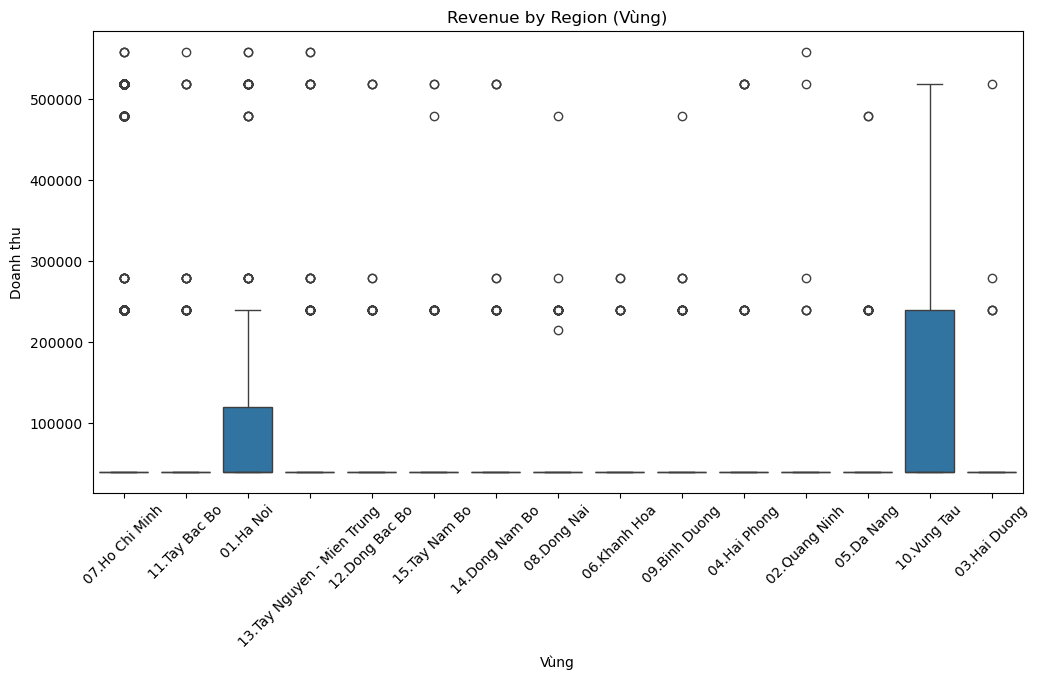


=== AVERAGE REVENUE BY REGION ===
Vùng
10.Vung Tau                   107814.893617
13.Tay Nguyen - Mien Trung    105324.264706
01.Ha Noi                     103841.797753
04.Hai Phong                   96900.000000
11.Tay Bac Bo                  96470.547945
05.Da Nang                     92352.808989
12.Dong Bac Bo                 87630.841121
02.Quang Ninh                  86961.538462
06.Khanh Hoa                   86782.500000
14.Dong Nam Bo                 85256.410256
03.Hai Duong                   83790.000000
15.Tay Nam Bo                  78214.569536
08.Dong Nai                    77009.174312
09.Binh Duong                  75066.101695
07.Ho Chi Minh                 73274.763407
Name: Doanh thu, dtype: float64


In [ ]:
# ---------------------------
# 4. REVENUE BY REGION
# ---------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vùng', y='Doanh thu', data=df)
plt.title('Revenue by Region (Vùng)')
plt.xticks(rotation=45)
plt.show()

region_avg = df.groupby('Vùng')['Doanh thu'].mean().sort_values(ascending=False)
print("\n=== AVERAGE REVENUE BY REGION ===")
print(region_avg)

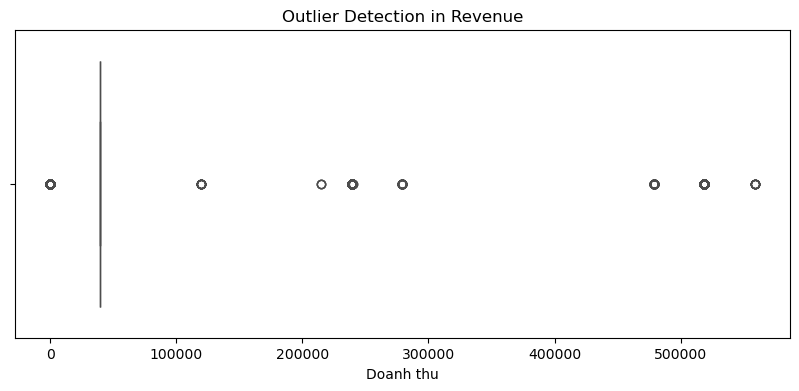

In [ ]:
# ---------------------------
# 5. OUTLIER DETECTION
# ---------------------------
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Doanh thu'], color='orange')
plt.title("Outlier Detection in Revenue")
plt.show()

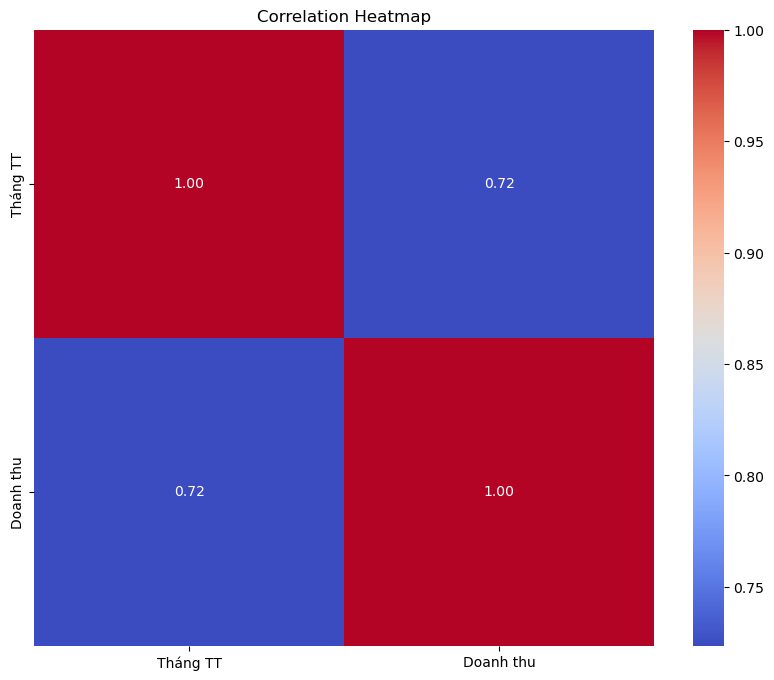

In [ ]:

# ---------------------------
# 6. CORRELATION MATRIX
# ---------------------------
df_numeric = df.select_dtypes(include='number')
corr = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


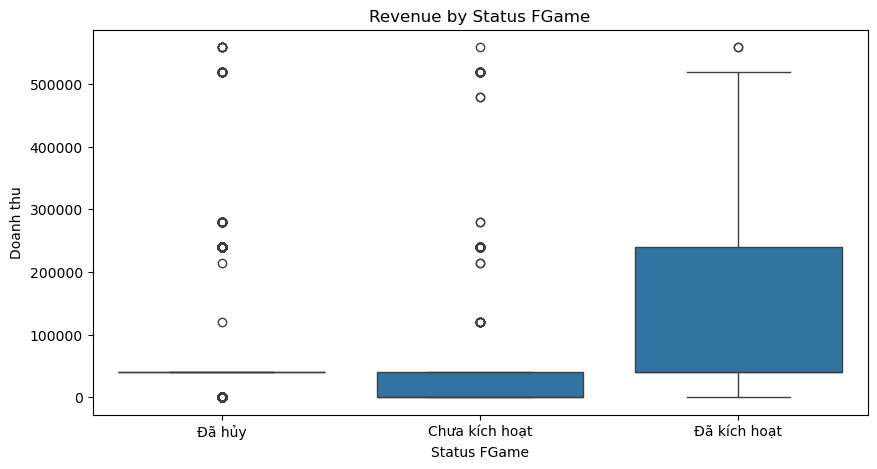

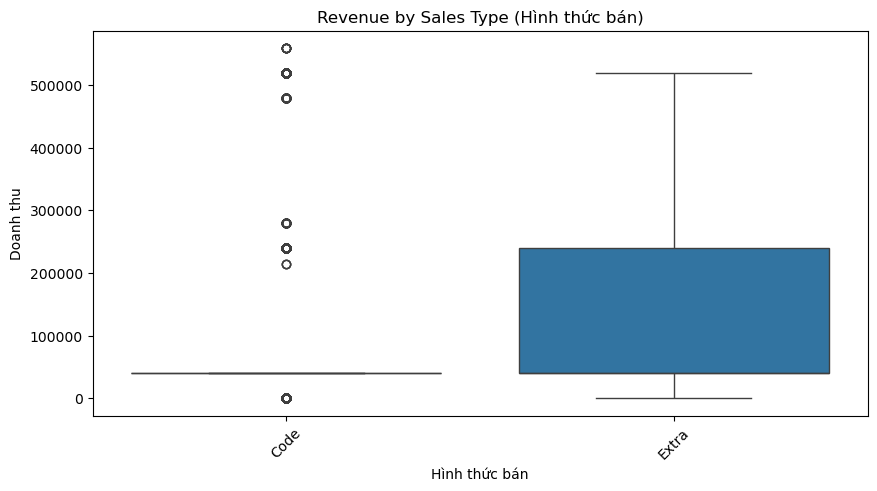

In [ ]:
# ---------------------------
# 7. FEATURE-TARGET RELATIONSHIPS
# ---------------------------
plt.figure(figsize=(10, 5))
sns.boxplot(x='Status FGame', y='Doanh thu', data=df)
plt.title('Revenue by Status FGame')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Hình thức bán', y='Doanh thu', data=df)
plt.title('Revenue by Sales Type (Hình thức bán)')
plt.xticks(rotation=45)
plt.show()